In [7]:
import torch
import torchvision
import torch.nn as nn

import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image


In [22]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn_model = torchvision.models.resnet34(weights=True)
num_features = cnn_model.fc.in_features
cnn_model.fc = nn.Linear(num_features, 8)
cnn_model.load_state_dict(torch.load('./PyeonHaengModel.pth'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

cnn_model.cuda()


transforms_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class_names = ['beverage_bottle', 'beverage_can', 'beverage_milk', 'dailynecessity', 'iceCream', 'instanceFood', 'noodle', 'snack']


In [19]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    
    plt.imshow(input)
    plt.title(title)
    plt.show()


In [20]:
# 이미지 분류 함수 정의
def classify_image(image_path, model, transforms):
    image = Image.open(image_path)
    image = transforms(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
    return preds[0]


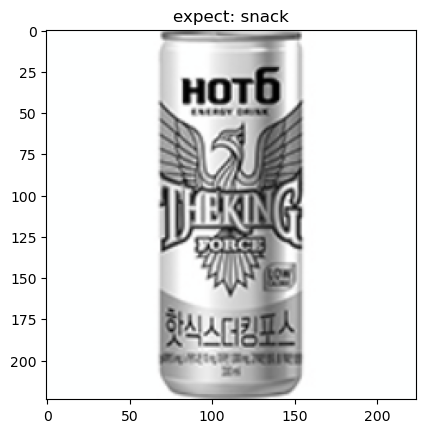

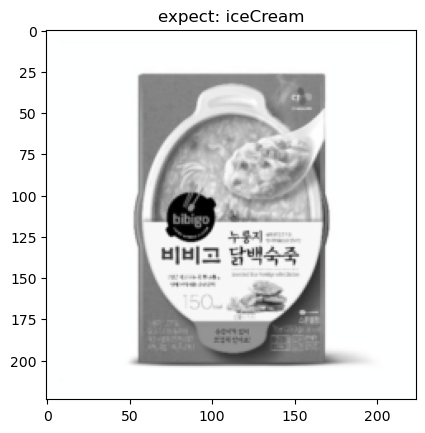

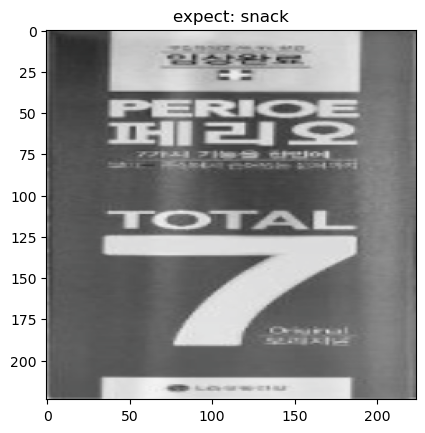

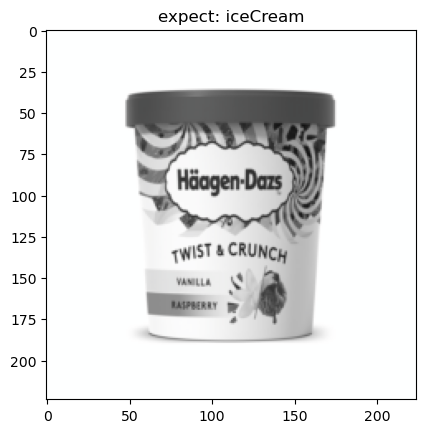

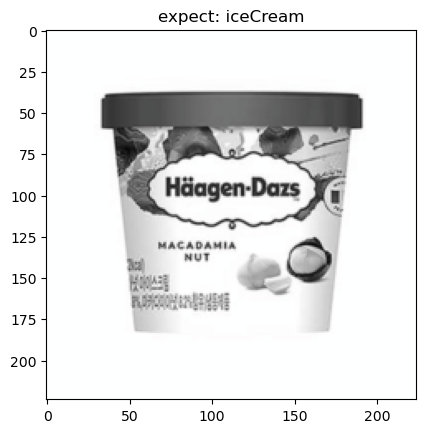

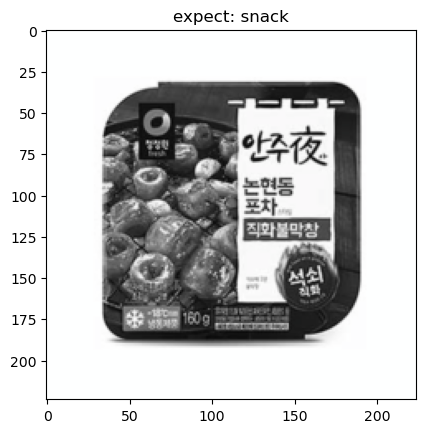

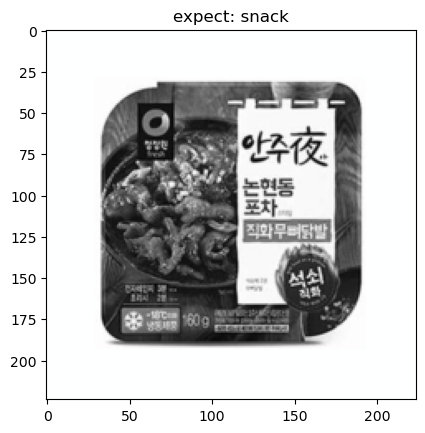

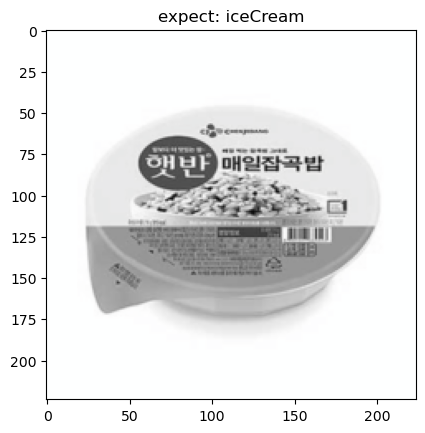

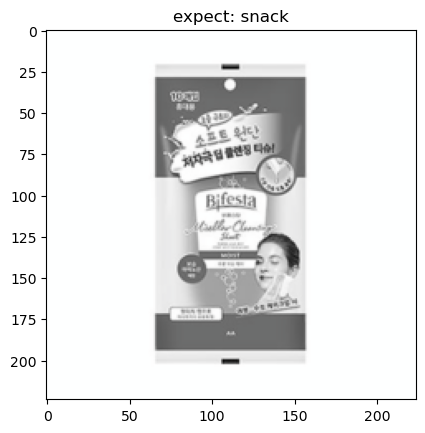

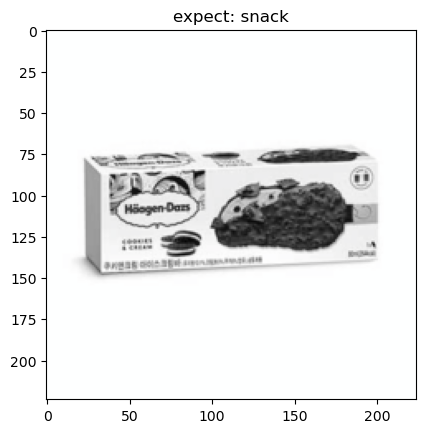

UnidentifiedImageError: cannot identify image file './dataset/AI-dataset/data/test\\2566.jpg'

In [21]:
folder_path = './dataset/AI-dataset/data/test'
result_file_path = './result.txt'

with open(result_file_path, 'w') as f:
    cnt = 0
    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        predicted_class = classify_image(file_path, cnn_model, transforms_test)
        result_str = f"{file_name}: {class_names[predicted_class]}\n"
        f.write(result_str)

        if cnt < 10:
            image = Image.open(file_path)
            image = transforms_test(image).unsqueeze(0).to(device)
            imshow(image.cpu().data[0], title='expect: ' + class_names[predicted_class])
            cnt += 1
